## Import Packages

In [38]:
import pandas as pd
import numpy as np
import random as rnd

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

In [40]:
import xgboost as xgb

# Import data

In [210]:
data = pd.read_csv('founder_V0.3_founder.csv')

In [211]:
# Replace detailed role variable with binary variable which represents if the person is founder or not 
data['Primary Job Title'] = data['Founder']

In [212]:
# Drop variables not to be used in our models
data = data.drop(['Full Name','Bio','Founder'], axis=1)

In [213]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success
0,0,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1
1,1,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1
2,1,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1
3,1,1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1
4,1,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1


In [214]:
# Convert gender variable (0 or 1 or 2) to integers
data['Gender'] = data['Gender'].astype(int)

In [215]:
data.shape

(18361, 18)

In [216]:
# Drop those rows that have 2 as Gender variable (these are the ones who do not wish to identify their genders)
data=data[(data.Gender==2) == False]

In [217]:
data.shape

(18230, 18)

In [218]:
# Changing the strings in the Headquarters Location column with their frequencies over the all dataset.
df1 = data['Headquarters Location '].value_counts().reset_index(name='count').rename(columns={'index': 'Headquarters Location '})

In [219]:
data = pd.merge(data,df1,on=['Headquarters Location '], how='left' )

In [221]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success,count
0,0,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,6535
1,1,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,6535
2,1,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1,6535
3,1,1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1,6535
4,1,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1,1935


In [222]:
data['Headquarters Location '] = data['count']

In [223]:
# Drop the frequencies column and two other columns that will not be used in the model.

data = data.drop(['count'], axis=1)

data = data.drop(['Categories','Closed Date'], axis=1)

In [224]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Headquarters Location,Operating Status,Founded Date,Company Type,Number of Founders,Success
0,0,1,14445,7,11,21,0,9,6,2,6535,1,2003,1,4,1
1,1,1,100,2,1,1,0,0,0,1,6535,1,2003,1,4,1
2,1,1,19678,10,6,7,0,0,0,5,6535,1,2004,1,5,1
3,1,1,128,1,6,7,0,0,1,5,6535,1,2006,1,2,1
4,1,1,861,1,0,0,0,0,0,0,1935,1,2013,0,3,1


## Normalization

We divide every numerical variable by the maximum value it may take to nomalize them between 0 and 1

In [225]:
data['Number of News Articles'] = data['Number of News Articles']/data['Number of News Articles'].max()

In [226]:
data['Number of Founded Organizations'] = data['Number of Founded Organizations']/data['Number of Founded Organizations'].max()

In [227]:
data['Number of Portfolio Companies'] = data['Number of Portfolio Companies']/data['Number of Portfolio Companies'].max()

In [228]:
data['Number of Investments_x'] = data['Number of Investments_x']/data['Number of Investments_x'].max()

In [229]:
data['Number of Partner Investments'] = data['Number of Partner Investments']/data['Number of Partner Investments'].max()

In [230]:
data['Number of Lead Investments_x'] = data['Number of Lead Investments_x']/data['Number of Lead Investments_x'].max()

In [231]:
data['Number of Exits_x'] = data['Number of Exits_x']/data['Number of Exits_x'].max()

In [232]:
data['Number of Events_x'] = data['Number of Events_x']/data['Number of Events_x'].max()

In [233]:
data['Number of Founders'] = data['Number of Founders']/data['Number of Founders'].max()

In [234]:
data['Headquarters Location '] = data['Headquarters Location ']/data['Headquarters Location '].max()

In [235]:
#Split the data to training and test datasets (0.8 and 0.2)

from sklearn.model_selection import train_test_split

X_data2 = data.iloc[:,:-1] 
Y_data2 = data['Success'] 
    
print("Feature vector shape=", X_data2.shape)
print("Class shape=", Y_data2.shape)

Feature vector shape= (18230, 15)
Class shape= (18230,)


In [236]:
x_train, x_test, y_train, y_test = train_test_split(X_data2, Y_data2, test_size = 0.2 , random_state=100)

## Models

### XGBoost

In [116]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=10000)
gradboost.fit(x_train, y_train)
y_pred_xgb = gradboost.predict(x_test)

acc_gradboost_train = round(gradboost.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_gradboost_train)

acc_gradboost_test = round(gradboost.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_gradboost_test)

Train accuracy:  83.82
Test accuracy:  76.88


Average precision-recall score: 0.76


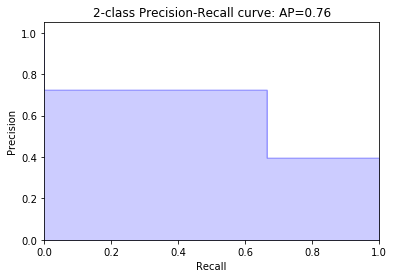

In [38]:
# Calculate and plot average precision recall score

from sklearn.metrics import average_precision_score
y_pred = y_pred_xgb
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [40]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_model_var_imp(gradboost, x_train, y_train)

0.838247394405


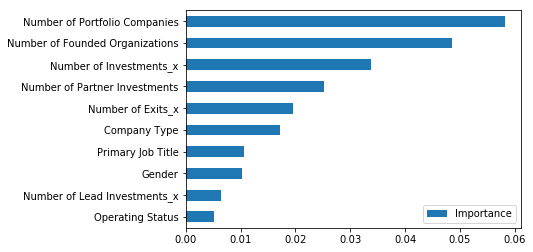

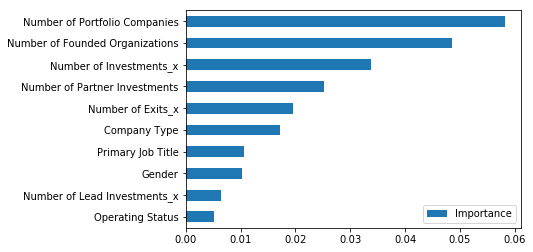

In [41]:
plt.show()

In [154]:
# Define Roc curve

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier


y_test = label_binarize(y_test, classes=[1,0])
y_train = label_binarize(y_train, classes=[1,0])

n_classes = y_train.shape[1]

ovr = OneVsRestClassifier(gradboost)

y_score = ovr.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



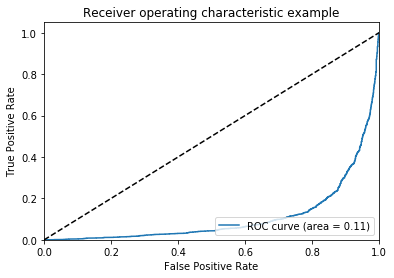

In [155]:
# Plot  ROC 

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Random Forest

In [123]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

C:\Anaconda\envs\Data-X\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train accuracy:  94.08
Test accuracy:  77.32


Average precision-recall score: 0.76


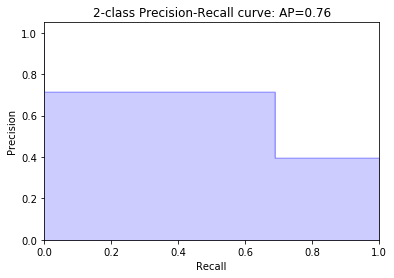

In [33]:
# Calculate and plot average precision recall score


y_pred = y_pred_rnf
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.form# Plot  ROC 

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()at(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [34]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_model_var_imp(random_forest, x_train, y_train)

0.94082556226


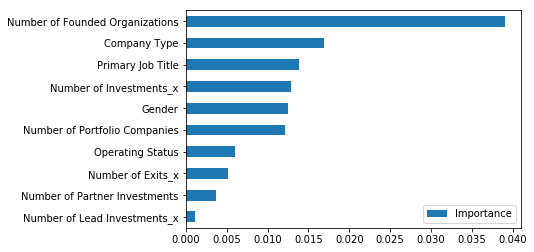

In [35]:
plt.show()

In [124]:
# Define Roc curve

y_test = label_binarize(y_test, classes=[1,0])
y_train = label_binarize(y_train, classes=[1,0])

n_classes = y_train.shape[1]

ovr = OneVsRestClassifier(random_forest)

y_score = ovr.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



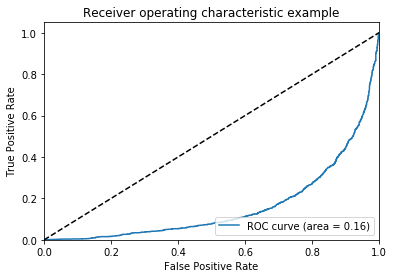

In [125]:
# Plot  ROC curve

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Logistic Regression

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

Train accuracy:  60.98
Test accuracy:  61.11


Average precision-recall score: 0.50


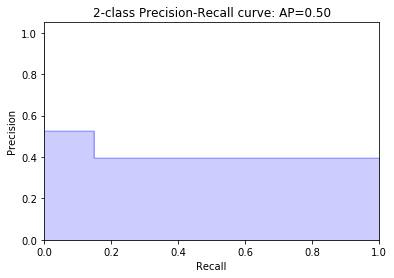

In [111]:
# Calculate and plot average precision recall score

y_pred = y_pred_log
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [ ]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_model_var_imp(logreg, x_train, y_train)

In [ ]:
plt.show()

### Support Vector Machines

In [68]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)

acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_svc_train)

acc_svc_test = round(svc.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_svc_test)

Train accuracy:  74.47
Test accuracy:  74.85


Average precision-recall score: 0.74


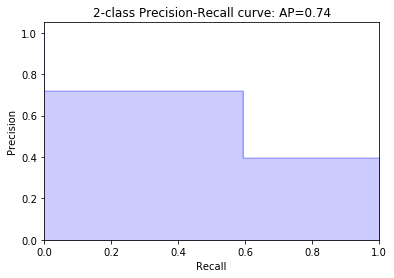

In [112]:
# Calculate and plot average precision recall score

y_pred = y_pred_svm
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

### kNN

In [92]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print('Training accuracy for kNN: ',acc_knn)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Test accuracy for kNN: ',acc_knn)

Training accuracy for kNN:  83.74
Test accuracy for kNN:  72.71


Average precision-recall score: 0.72


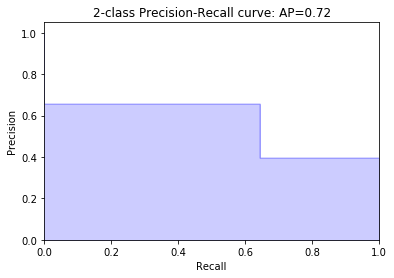

In [93]:
# Calculate and plot average precision recal score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

# Alternative approach

In [201]:
data = pd.read_csv('founder_V0.3_founder.csv')

In [202]:
# Replace detailed role variable with binary variable

data['Primary Job Title'] = data['Founder']

In [203]:
# Drop variables not to be used in our models

data = data.drop(['Full Name','Bio','Founder'], axis=1)

In [204]:
# Encode multivalue categorical variables to unique integers

HQ = preprocessing.LabelEncoder()
#to convert into numbers
data['Headquarters Location '] = HQ.fit_transform(data['Headquarters Location '])

CAT = preprocessing.LabelEncoder()
#to convert into numbers
data['Categories'] = CAT.fit_transform(data['Categories'])

In [205]:
# Normalize variables

#data['Number of News Articles'] = data['Number of News Articles']/data['Number of News Articles'].max()

#data['Number of Founded Organizations'] = data['Number of Founded Organizations']/data['Number of Founded Organizations'].max()

#data['Number of Portfolio Companies'] = data['Number of Portfolio Companies']/data['Number of Portfolio Companies'].max()

#data['Number of Investments_x'] = data['Number of Investments_x']/data['Number of Investments_x'].max()

#data['Number of Partner Investments'] = data['Number of Partner Investments']/data['Number of Partner Investments'].max()

#data['Number of Lead Investments_x'] = data['Number of Lead Investments_x']/data['Number of Lead Investments_x'].max()

#data['Number of Exits_x'] = data['Number of Exits_x']/data['Number of Exits_x'].max()

#data['Number of Events_x'] = data['Number of Events_x']/data['Number of Events_x'].max()

#data['Number of Founders'] = data['Number of Founders']/data['Number of Founders'].max()

#data['Headquarters Location '] = data['Headquarters Location ']/data['Headquarters Location '].max()

In [206]:
# Train test split

X_data2 = data.iloc[:,:-1] 
Y_data2 = data['Success'] 
    
print("Feature vector shape=", X_data2.shape)
print("Class shape=", Y_data2.shape)

x_train, x_test, y_train, y_test = train_test_split(X_data2, Y_data2, test_size = 0.2 , random_state=100)

Feature vector shape= (18361, 17)
Class shape= (18361,)


In [207]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=10000)
gradboost.fit(x_train, y_train)
y_pred_xgb = gradboost.predict(x_test)

acc_gradboost_train = round(gradboost.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_gradboost_train)

acc_gradboost_test = round(gradboost.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_gradboost_test)

Train accuracy:  95.6
Test accuracy:  82.98


Average precision-recall score: 0.83


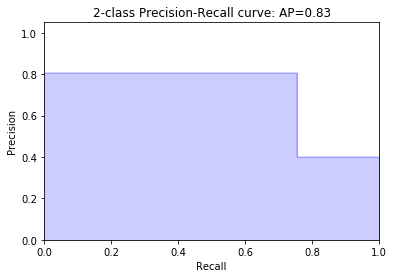

In [189]:
# Calculate and plot average precision recall score

y_pred = y_pred_xgb
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [190]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_model_var_imp(gradboost, x_train, y_train)

0.95595043573


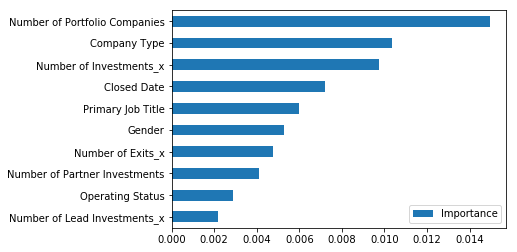

In [191]:
plt.show()

In [144]:
# Define Roc curve

y_test = label_binarize(y_test, classes=[1,0])
y_train = label_binarize(y_train, classes=[1,0])

n_classes = y_train.shape[1]

ovr = OneVsRestClassifier(gradboost)

y_score = ovr.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



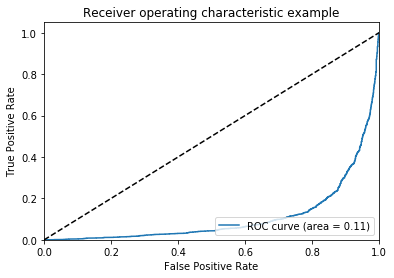

In [145]:
# Plot  ROC curve

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Random Forest

In [17]:
random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

Train accuracy:  99.96
Test accuracy:  80.32


### Logistic Regression

In [18]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

Train accuracy:  61.15
Test accuracy:  59.98


### Support Vector Machines

In [19]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)

acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_svc_train)

acc_svc_test = round(svc.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_svc_test)

Train accuracy:  89.37
Test accuracy:  76.69


### kNN

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print('Training accuracy for kNN: ',acc_knn)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Test accuracy for kNN: ',acc_knn)

Training accuracy for kNN:  88.91
Test accuracy for kNN:  76.72


### Perceptron

In [182]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.01, random_state=100)
y_pred = ppn.fit(x_train, y_train).predict(x_test)

acc_ppn = round(ppn.score(x_train, y_train) * 100, 2)
print('Training accuracy for kNN: ',acc_ppn)
acc_ppnn = round(ppn.score(x_test, y_test) * 100, 2)
print('Test accuracy for kNN: ',acc_ppn)

Training accuracy for kNN:  61.15
Test accuracy for kNN:  61.15


C:\Anaconda\envs\Data-X\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
